# **SMM284_Applied_Machine_Learning**


# 1. Introduction


The data is available at Kaggle: <https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers>

Customer churn, also known as customer attrition, is when someone chooses to stop using your products or services (Qualtrics.com, n.d.). As acquiring new customers is much more costly than retaining existing ones, companies seek to prevent churn with different customer retention strategies. Thus, it would be advantageous to determine what factors are triggering churn and precisely which customers are at risk. This would enable the company to target customer groups more efficiently with loyalty programs and retention tactics.
 
Given 14 demographic and personal attributes from 10000 European bank customers, the analysis compares the performance of different classification techniques ( machine learning and deep learning), to suggest an efficient model for predicting customer churn in the banking industry. A lexicon for the dataset can be found below.

#### Data Lexicon for churn.csv

Variable |Description
:-----|:----- |
RowNumber|corresponds to the record (row) number
CustomerId|contains the unique identifier of a customer
Surname|refers to the surname of a customer
CreditScore|refers to a number that depicts a customer's creditworthiness
Geography|refers to a customer’s geographic location
Gender|refers to a customer's gender
Age|refers to a customer's age
Tenure|refers to the number of years that the customer has been a client of the bank
Balance|refers to the amount of money in a customer's account with the bank
NumOfProducts|refers to the number of products that a customer has purchased through the bank
HasCrCard|denotes whether or not a customer has a credit card
IsActiveMember|denotes whether or not a customer engages in frequent banking activities
EstimatedSalary|refers to a customer's estimated salary (unit not given)
Exited|whether or not the customer left the bank

#### Mapping Out Analysis to Class Material
Class |Focus |Application in the analysis
:-----|:-----|:----- 
2|Data cleaning and preparation for machine learning|All the relevant steps concerned with data praparation and cleaning were applied as the preliminary steps before training the models. 
3|Linear regression, its diagnostics and more advanced extensions|- As our analysis involved a classification problem, we followed the steps in creating the models used for the California housing example. <br> - By creating different models, we were able to compare performance metrics side by side and determine the best model to proceed with. <br> - We also optimized the models using cross validation grid searches to find the optimal model parameters as per the class.
4|Textual data machine learning|The dataset did not contain any textual data, for this reason there was no requirement to apply natural language processing.
5|Deep learning| The final model developed was a feed-forward sequential neural network, whereby hyperparameters were fine-tuned using the Keras tuner <br> in order to improve performance.


# Analysis

# 2. Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from pprint import pprint
import sklearn as sk
import keras_tuner as kt
import warnings
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
warnings.filterwarnings('ignore')

# 3. Data Preprocessing

## 3.1. Data Cleaning and Descriptive Statistics
The performance of most Machine Learning algorithms may be hindered by any missing values or duplicate rows (Géron, 2019). In the first stage of data cleaning, we inspect whether any NAs or duplicates are present. The 'Exited' column will designate the dependent variable that denotes a customer left the bank. When inspecting the distribution of the two classes in the 'Exited' variable, a significant class imbalance was apparent with only a minority of customers having exited (20.73%).

In [ ]:
# read the csv file
url = 'https://raw.githubusercontent.com/tim5633/Machine_Learning_Methodology/main/churn.csv' # in colab
df = pd.read_csv(url) # in colab
# df = pd.read_csv('churn.csv') # in the jpnb
# check for na values
print('=isnull==========================================================')
print(df.isnull().sum())
# check for duplicate values
print('=duplicated======================================================')
print(df.duplicated().sum())
# check the unique values
print('=nunique=========================================================')
print(df.nunique())
# check the data types
print('=dtypes=========================================================')
print(df.dtypes)
# check the data shape
print('=class imbalance==============================================')
print("not Exited 0 : ",df[df['Exited']==0].shape)
print("Exited 1 : ",df[df['Exited']==1].shape)
# check the overall data 
df

### The analysis shows that there is nothing to clean in the data.

=isnull==========================================================
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
=duplicated======================================================
0
=nunique=========================================================
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64
=dtypes=========================================================
RowNumber            int64
CustomerId           int64
Surname    

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 3.2. Data pre-processing function 
A data pre-processing function was created to aggregate all data transformations within a single function that can be applied to each data subset separately. If new data were to be added, having the pre-processing streamlined as such, speeds things up drastically. 
-       The ‘Surname’, ‘RowNumber’, and CustomerId columns were dropped as they consisted of only unique values and no relevant data.
-       As most Machine Learning algorithms prefer to work with numbers (Géron, 2019), the categorical variables have been transformed to numerical variables using dummy variables.


In [ ]:
# Defining the preprocessing function
def preprocesssing(df):    
    # Drop the Surname, RowNumber, and CustomerId columns (no duplicates, all unique)
    df.drop(columns=['Surname'],inplace=True)
    df.drop(columns=['RowNumber'],inplace=True)
    df.drop(columns=['CustomerId'],inplace=True)
    #Make dummies from categorical variables
    categorical_cols = [
        'Geography', 'Gender'
    ]
    df = pd.get_dummies(df,
                        columns=categorical_cols,
                        dummy_na=False, # there's no nan in the df
                        drop_first=True)
    return df

df_preview = df.copy()
df = preprocesssing(df)

## 3.3. Data partitioning (training, validation, testing sets)
First, we allocate 7500 instances to a combined training and validation set, and 2500 for the test set. Next, we divide the combined set into 6000 instances for the training set and 1500 for the validation set.
 
We have set aside 60% of the data for training as models learn better with more data. 15% of the data will be used to fine-tune the model parameters and select the best performing classification model based on accuracy. The remaining 25% of the data will be used to test final model’s prediction accuracy.
 
Ensuing the split, we examined each data subset’s representativeness to the original dataset. This was done by comparing the distribution of the ‘Exited’ variable and the distribution of categorical variables across the subsets. 


### 3.3.1. Preview Before Splitting

In [ ]:
# Inspecting the distribution between the categorical variables in the main 
#dataset to try and preserve the same ratio in the train, test, and validation sets.
print('''
\033[1m ==Gender== \033[0m
{}
\033[1m ==Geography== \033[0m
{}
\033[1m ==Exited== \033[0m
{}
'''.format(df_preview.Gender.value_counts()/len(df_preview),
df_preview.Geography.value_counts()/len(df_preview),df_preview.Exited.value_counts()/len(df_preview)))


 ==Gender== 
Male      0.5457
Female    0.4543
Name: Gender, dtype: float64
 ==Geography== 
France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64
 ==Exited== 
0    0.7963
1    0.2037
Name: Exited, dtype: float64



### 3.3.2. Data partitioning

In [ ]:
# Specify X and y 
y = df['Exited'] # 1 in the case of Exited; 0 not Exited
X = df.drop(columns='Exited')

# split training, validation and test sets
# use 'stratify' to evenly distribute the data of splitting
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=461)

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_val, Y_train_val, train_size = 0.8, stratify=Y_train_val, random_state=461)
# verifying the data distribution
print('X_train:',X_train.shape, ', X_valid:', X_valid.shape , ', X_test:', X_test.shape)
# verifying if the split between classes is preserved
print('Y_train mean:', Y_train.mean(), ', Y_test mean:', Y_test.mean(), ', Y_valid mean:', Y_valid.mean())

X_train: (6000, 11) , X_valid: (1500, 11) , X_test: (2500, 11)
Y_train mean: 0.20366666666666666 , Y_test mean: 0.2036 , Y_valid mean: 0.204


In [ ]:
out_lier = X_train.CreditScore.sort_values(ascending=True)[0:7]
out_lier

1631    350
1838    350
8723    350
8762    350
1962    358
1405    359
1193    363
Name: CreditScore, dtype: int64

### 3.3.4. Inspecting Representativeness of data subsets

In [ ]:
# verifying if the split within the categories closely matches the main dataset
print(
'''
\033[1m ==Train Gender Male== \033[0m
{}
\033[1m ==Test Gender Male== \033[0m
{}
\033[1m ==Valid Gender Male== \033[0m
{}
'''.format(X_train.Gender_Male.value_counts()/len(X_train), X_test.Gender_Male.value_counts()/len(X_test), X_valid.Gender_Male.value_counts()/len(X_valid))
)
print(
'''
\033[1m ==Train Geography Germany== \033[0m
{}
\033[1m ==Test Goegraphy Germany== \033[0m
{}
\033[1m ==Valid Geography Germany== \033[0m
{}
'''.format(X_train.Geography_Germany.value_counts()/len(X_train),X_test.Geography_Germany.value_counts()/len(X_test), X_valid.Geography_Germany.value_counts()/len(X_valid))
)
print(
'''
\033[1m ==Train Geography Spain== \033[0m
{}
\033[1m ==Test Goegraphy Spain== \033[0m
{}
\033[1m ==Valid Geography Spain== \033[0m
{}
'''.format(X_train.Geography_Spain.value_counts()/len(X_train),X_test.Geography_Spain.value_counts()/len(X_test), X_valid.Geography_Spain.value_counts()/len(X_valid))
)


 ==Train Gender Male== 
1    0.547833
0    0.452167
Name: Gender_Male, dtype: float64
 ==Test Gender Male== 
1    0.5452
0    0.4548
Name: Gender_Male, dtype: float64
 ==Valid Gender Male== 
1    0.538
0    0.462
Name: Gender_Male, dtype: float64


 ==Train Geography Germany== 
0    0.750833
1    0.249167
Name: Geography_Germany, dtype: float64
 ==Test Goegraphy Germany== 
0    0.746
1    0.254
Name: Geography_Germany, dtype: float64
 ==Valid Geography Germany== 
0    0.747333
1    0.252667
Name: Geography_Germany, dtype: float64


 ==Train Geography Spain== 
0    0.754667
1    0.245333
Name: Geography_Spain, dtype: float64
 ==Test Goegraphy Spain== 
0    0.7432
1    0.2568
Name: Geography_Spain, dtype: float64
 ==Valid Geography Spain== 
0    0.758
1    0.242
Name: Geography_Spain, dtype: float64



## 3.4. Exploratory Analysis (training data)

### 3.4.1. Data Visualization

- Histograms were produced to better understand the distribution of the numerical variables. This was supplemented by boxplots that helped further our understanding and also identify possible outliers in the data.


The following observations can be drawn from the histograms:
- The Credit score feature seems to follow a normal distribution with most of the customers having a Credit score in the range of [600,700] with a small spike also in the right-hand side of the distribution (at the highest credit scores)
- For the Balance feature, the majority of observations have 0 balance, and the remaining ones are normally distributed around 130000 
- The Estimated Salary feature seems to have uniform distribution and the clients are almost equally distributed at all the values of the features
- Regarding the distribution of the two classes, it can be seen that both exited and remaining customers have similar distributions for the 3 numeric features

A correlation matrix was also visualised to examine the relationships between variables and check for multicollinearity. The following was deduced:
  - Customers in Spain tend to have lower bank balances.
  - Customers that have bought less bank products tend to have higher bank balances.
  - While all variables appear to have some correlation, there appears to be no severe issue of multicollinearity so we may proceed to modelling.
 


- The visualised box plot for ‘CreditScore’ reveals some outliers may be present. Z-scores were used to confirm this and 7 outliers were identified in this column. Upon inspecting the values of these outliers, they were found to be within the standard range of credit scoring that is between 0-999 (What Is A Good Credit Score? | Experian, n.d.).

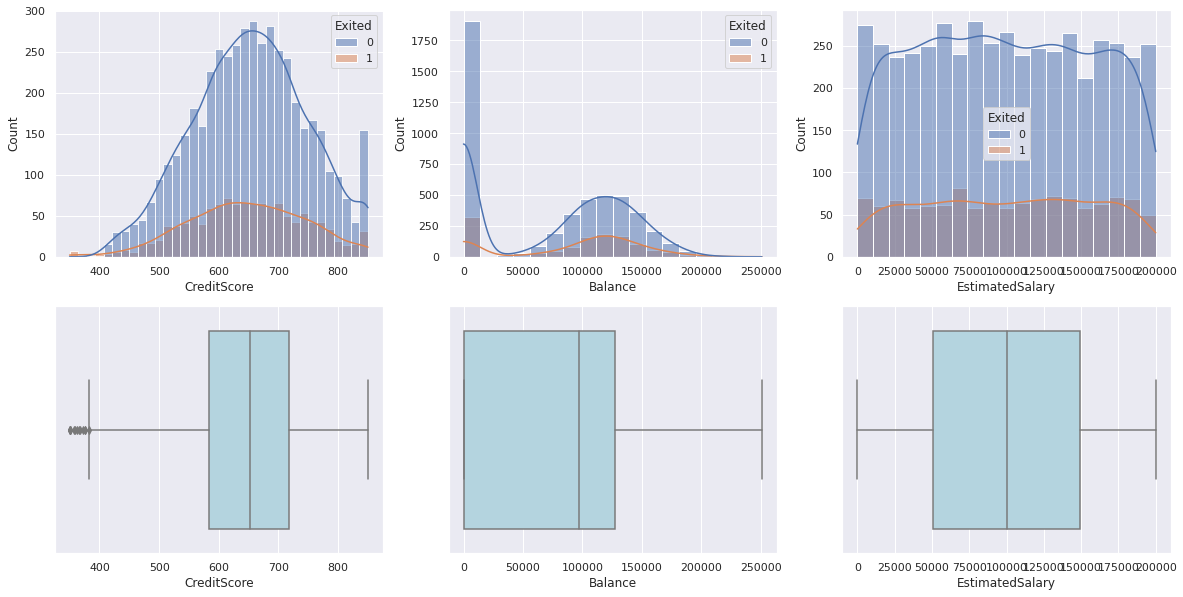

<Figure size 432x288 with 0 Axes>

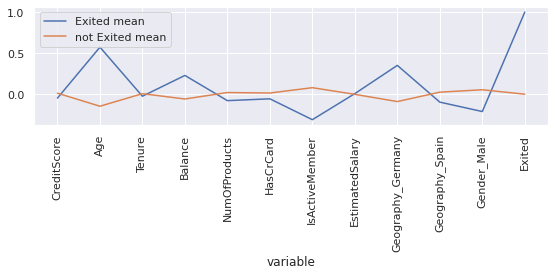

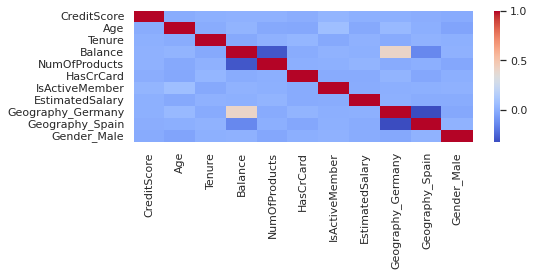

In [ ]:
#################################################### distribution plot ####################################################
df_plot = X_train.copy()
df_plot['Exited'] = Y_train # this is only for vizualization but not for the model
# plotting the variable of 1 and 0 of distribution (after pre-processing)
numeric_columns = [
    'CreditScore', 'Balance', 'EstimatedSalary'
]
# see all the features differences of 0 and 1 with the mean (after preprocessing)
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(numeric_columns):
    if i < 4:
        sns.histplot(df_plot, x=f"{col}", hue = "Exited", kde=True, color="skyblue", ax=axs[0, i])
        sns.boxplot(df[f'{col}'], color='lightblue', ax=axs[1,i])
plt.figure()

##################################################### snake plot ####################################################
# Note rthat we take a look at the scalar data (but not really apply the scalar here, we should apply after the split
scaler = StandardScaler()
# df_plot[numeric_columns] = scaler.fit_transform(df_plot[numeric_columns])
# withot 'Exited', fit_transform with the other columns
col_names = df_plot.columns
df_plot[col_names] = scaler.fit_transform(df_plot[col_names])
df_plot['Exited'] = Y_train
# Plot out to see the mean of the data
df_Exited_describe  = df_plot[df_plot['Exited']==1].describe()
df_not_Exited_describe  = df_plot[df_plot['Exited']==0].describe()
df_Exited_mean = df_Exited_describe.iloc[1:2]
df_not_Exited_mean = df_not_Exited_describe.iloc[1:2]
df_Exited_mean_transposed = df_Exited_mean.T 
df_not_Exite_mean_transposed = df_not_Exited_mean.T 

df_Exited_mean_transposed['variable'] = df_Exited_mean_transposed.index
df_not_Exite_mean_transposed['variable'] = df_not_Exite_mean_transposed.index
df_Exited_mean_transposed = df_Exited_mean_transposed.rename(columns={'mean': 'Exited mean'}, index={'variable': 'variable'})
df_not_Exite_mean_transposed = df_not_Exite_mean_transposed.rename(columns={'mean': 'not Exited mean'}, index={'variable': 'variable'})

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

ax = df_Exited_mean_transposed.plot(x='variable', y='Exited mean')
df_not_Exite_mean_transposed.plot(ax=ax, x='variable', y='not Exited mean')

plt.xticks(range(len(df_Exited_mean_transposed['variable'])),list(df_not_Exite_mean_transposed['variable']),rotation=90)
plt.show()

#################################################### the correlation Plot ####################################################
sns.heatmap(X_train.corr(), cmap='coolwarm')

In [ ]:
# Outliers detection
df_train = pd.concat([X_train, Y_train], axis=1)

## Finding for creditScore
# Calculating the Z scores
Z_credit = stats.zscore(df_train["CreditScore"],nan_policy="omit") #compute z-score table
# Find the ones with Z scores out of the range [-3,3]
print('Outliers at credit scores')
print('=========================')
print(np.where((Z_credit>3) | (Z_credit<-3)))

## Finding for Balance
# Calculating the Z scores
Z_balance = stats.zscore(df_train["Balance"],nan_policy="omit") #compute z-score table
# Find the ones with Z scores out of the range [-3,3]
print('Outliers at Balance')
print('===================')
print(np.where((Z_balance>3) | (Z_balance<-3)))

## Finding for Estimated salaries
# Calculating the Z scores
Z_salary = stats.zscore(df_train["EstimatedSalary"],nan_policy="omit") #compute z-score table
# Find the ones with Z scores out of the range [-3,3]
print('Outliers at Estimated Salary')
print('============================')
print(np.where((Z_salary>3) | (Z_salary<-3)))

Outliers at credit scores
(array([1076, 1760, 2076, 2336, 3067, 3736, 4876]),)
Outliers at Balance
(array([], dtype=int64),)
Outliers at Estimated Salary
(array([], dtype=int64),)


## 3.5. Standardizing the Data
-       Having input attributes with very different scales hinders the performance of most machine learning algorithms (Géron, 2019). Accordingly, all numerical features have been standardized to have a mean of 0 and unit variance.
- Standardisation has been applied to each data subset separately to avoid contaminating the training set with validation or testing data.


In [ ]:
# Scaling data subsets after the split(not the original dataset)
numeric_columns = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary'
]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_valid[numeric_columns] = scaler.transform(X_valid[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# 4. Naive Model

A Naïve Model is a simple classification model that doesn’t assume anything about the problem and the used data. There are various strategies to produce such a model. For our analysis, a benchmark accuracy score was deduced upon which the models that follow will be evaluated.

In [ ]:
# Naive expectation

print('''
Our Naive expectations:
======================
Percentage of customers which exited from the bank : {}%
Accuracy of prediction that everyone will remain at the bank: {}%
'''.format(round(df["Exited"].mean()*100,2), 100- round(df["Exited"].mean()*100,2) ))


Our Naive expectations:
Percentage of customers which exited from the bank : 20.37%
Accuracy of prediction that everyone will remain at the bank: 79.63%



In our dataset it can be seen that 20% of the population exited the bank. So based on that information, our naive expectation is that a model with no knowledge would predict that everyone remain, and be 80% accurate.

# 5. Baseline Model: Logistic Regression

The logistic regression classification model is a binary classifier. Also known as the Sigmoid function, the value of y of this function is between 0 and 1, and this distribution also conforms to the probability of 0 to 1. The principle is to regress the logarithm of the odds ratio, and then transform it through the sigmoid function to correspond the result to the relative event probability. 

- If the probability is greater than the threshold: it means that the probability of the event is relatively high, and returns 1
- else the probability < the threshold: means that the probability of the event occurrence is relatively low, it returns 0. 

Therefore, we can also see the probability of the sample occurring in each category of events through predict_prob.


1. Step1: we can construct our model through LogisticRegression() under linear_model in the sklearn module, and various parameters in parentheses can be adjusted as required to optimize the model
2. Step2: is to fit the model to our train data. At this point, our model has been constructed
3. Step3: we can feed valid data and use to see the corresponding prediction result of the validation
4. Step4: we can also use the score to see the proportion of our model's success in judging the train data or validation data using Accuracy and AUC. If the score in the train data is high, but the score in the validation data is very low, it means that the model may be overfitting, and it needs to be re-adjusted.

The final results on the Train and Validation data are presented below:
- R^2 = 0.8095 (on train): shown that the model is robust to process
- roc_auc_score 0.735
- Threshold =  0.175
- Model's Specificity (for predicting 0 correctly): 60.47%
- Model's Sensitivity (for predicting 1 correctly): 75.82%
- Validation set accuracy: 63.6%

The validation accuracy and specificity achieved by the model are unsatisfactory. In the sections that follow, we attempt to achieve better performance by trying other classification models. To find the best model for our business problem, we will record the results and variable importance for each model and compare them in the end.


Confusion matrix function for classification models

In [ ]:
# Creating the confusion matrix for the baseline and other models using
def c_m(y_test, y_pred):
    # Creating the confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    # Visualizing the Confusion Matrix
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.ylabel('Actual Results')
    plt.xlabel('Predicted Results')
    ax1.xaxis.set_label_position("top")

    print("Model's Accuracy:", (TP+TN)/(TN+TP+FN+FP))
    print("Model's Misclassification:", (FP+FN)/(TN+TP+FN+FP))
    print("Model's Specificity:", TN/(FP+TN))
    print("Model's Sensitivity:", TP/(TP+FN))

In [ ]:
# Train logistic model on the training set
logm_train = LogisticRegression(max_iter=2000).fit(X_train,Y_train.values.ravel()) 
print("Intercept = ",logm_train.intercept_)
print("Model coefficients = ", logm_train.coef_)
print("R^2 =",logm_train.score(X_train, Y_train))

Intercept =  [-1.02649409]
Model coefficients =  [[-0.05856876  0.76595827 -0.03360309  0.16628818 -0.04138279 -0.0736264
  -1.08769911  0.01344806  0.83466233  0.0485198  -0.52628182]]
R^2 = 0.8095


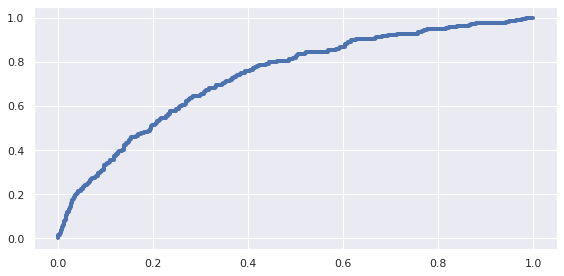

roc_auc_score 0.7350450509628754
Threshold =  0.17501184361799996


In [ ]:
# Use validation set to pick right threshold
# fit the validation data to the trained model
Y_probs =logm_train.predict_proba(X_valid)[:,1]
# get the fpr tpr score
fpr, tpr, thresholds = metrics.roc_curve(Y_valid,Y_probs)
plt.plot(fpr, tpr, linewidth=4)
plt.show()
#check the ROC score
print('roc_auc_score',roc_auc_score(Y_valid,Y_probs))
# get the threshold
threshold = thresholds[np.argmax(tpr - fpr)]
print("Threshold = ",threshold)

Intercept =  [-1.04492256]
Model coefficients =  [[-0.06037502  0.73777081 -0.03824067  0.175221   -0.06389525 -0.06584423
  -1.01251856  0.02636659  0.7861512   0.07896721 -0.54637914]]
R^2 = 0.8088
Accuracy =  0.636
[[722 472]
 [ 74 232]]
Model's Accuracy: 0.636
Model's Misclassification: 0.364
Model's Specificity: 0.6046901172529313
Model's Sensitivity: 0.7581699346405228


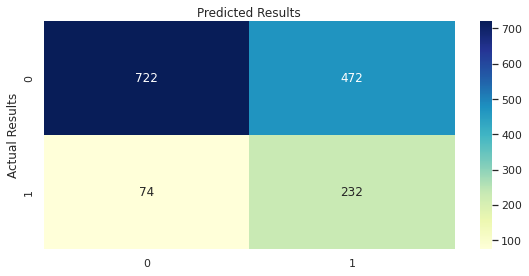

In [ ]:
# Retraining the final model with training+validation
train_val_X = pd.concat([X_train, X_valid])
train_val_Y = pd.concat([Y_train, Y_valid])

logm = LogisticRegression(max_iter=2000).fit(train_val_X, train_val_Y.values.ravel())
print("Intercept = ",logm.intercept_)
print("Model coefficients = ", logm.coef_)
print("R^2 =",logm.score(train_val_X, train_val_Y))

Y_probs_val =logm.predict_proba(X_valid)[:,1]
Y_pred_val = np.where(Y_probs_val > threshold, 1, 0) #input the threshold
cm = confusion_matrix(Y_valid,Y_pred_val)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print("Accuracy = ",(TP+TN)/(TP+TN+FP+FN)) # or metrics.accuracy_score(Y_valid,Y_pred_val)
print(cm)
c_m(Y_valid, Y_pred_val)

In [ ]:
# create the dataframe to record the results
df_results = pd.DataFrame(columns=['model', 'accuracy_valid','Misclassification', 'Specificity', 'Sensitivity'])
# add the results to the dataframe
df_results.loc[0] = [
                    'Logistic Regression',
                    metrics.accuracy_score(Y_valid,Y_pred_val),
                    (FP+FN)/(TN+TP+FN+FP),
                     TN/(FP+TN), TP/(TP+FN)
                     ]

# get the variable names of train_val_X to list
train_val_X_var = list(train_val_X.columns)

# create the dataframe to record the coiefficients of the model
df_varaible = pd.DataFrame(columns=['variable_name', 'coef_logm'])
df_varaibles = pd.DataFrame(X_train.columns)
for i in range(len(df_varaibles)):
    if i != 8:
        df_varaible.loc[i] = [train_val_X_var[i], logm.coef_[0][i]]


In [ ]:
# df_results

# 6. Supervised Machine Learning Classifiers

## 6.1. Decision Tree

Decision Tree classifiers build a set of rules to predict an outcome based on the given features. The dataset gets split until all data points can be assigned to a class. The variables that are strongly correlated with the outcome are used first to organise the split. The algorithm chooses the variables based on how accurately that variable alone predicts the class and consequently further splits are used to validate the results. Often to decide the best number of splits, an alpha parameter is used to penalise the higher number of splits. Higher the number of splits, higher the accuracy but that leads to overfitting. Conversely, lower number of splits lead to lower accuracy and bias. Therefore, a trade-off must be made and that is best chosen using Cross Validation of the alpha parameter.


First lets create a basic unoptimised tree

Unoptimised Model Depth: 22
Unoptimised Tree Training Accuracy: 1.0
Unoptimised Tree Validation Accuracy: 0.7946666666666666


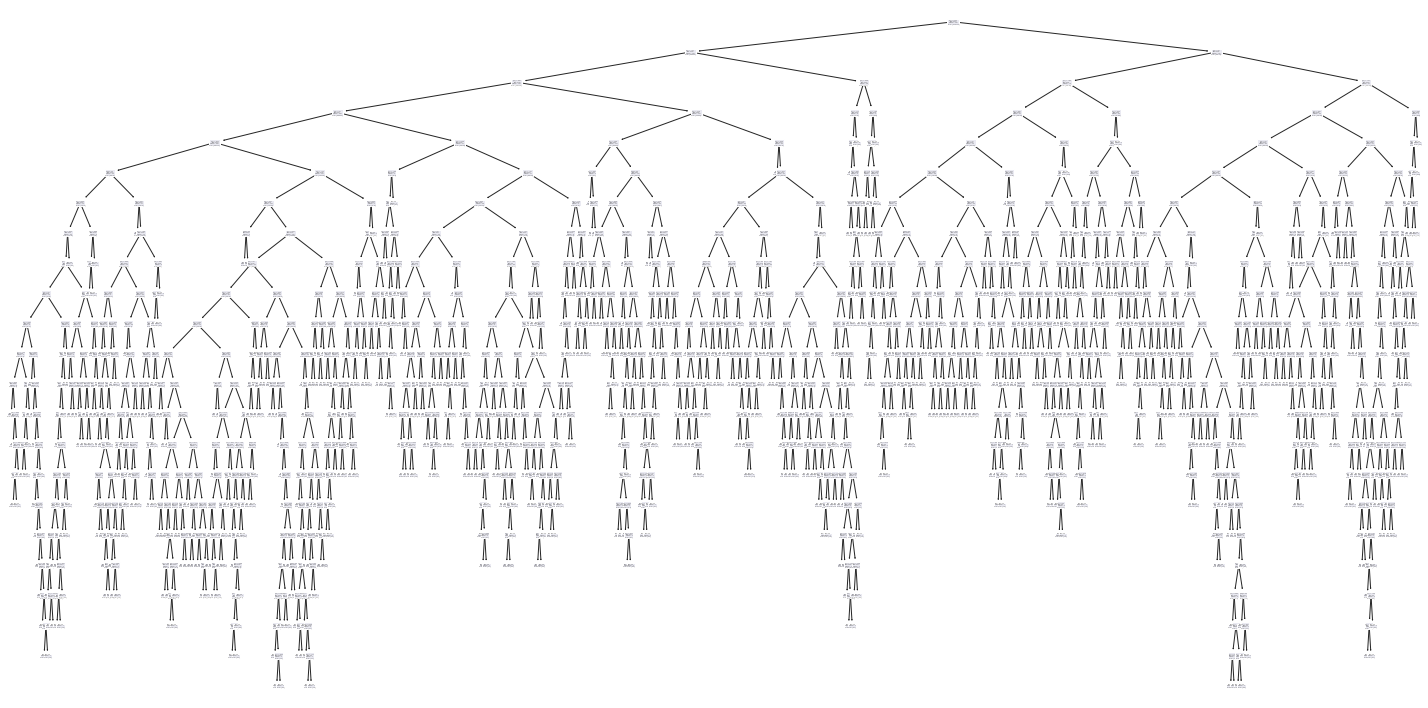

In [ ]:

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))
sk.tree.plot_tree(clf, ax=ax) 
print('Unoptimised Model Depth:',clf.tree_.max_depth)
print('Unoptimised Tree Training Accuracy:', accuracy_score(Y_train, clf.predict(X_train)))
print('Unoptimised Tree Validation Accuracy:', accuracy_score(Y_valid, clf.predict(X_valid)))

The tree, although an improvement over naive and baseline modes, is too deep at this point and might be prone to overfitting due to the number of splits. 
As seen in the training vs validation accuracy, there is indeed massive overfitting, thus the tree requires pruning.

Model's Accuracy: 0.7946666666666666
Model's Misclassification: 0.20533333333333334
Model's Specificity: 0.8685092127303182
Model's Sensitivity: 0.5065359477124183


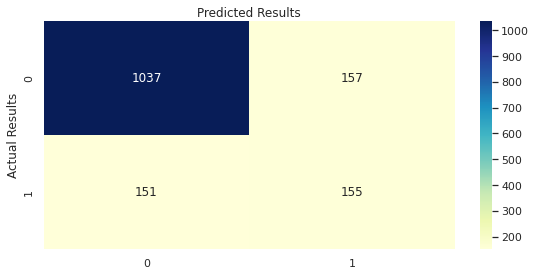

In [ ]:
Y_predict = clf.predict(X_valid)
c_m(Y_valid, Y_predict)

There is 20.5% misclassification, which is too high.

In [ ]:
# Looking at the feature importance
pd.DataFrame({'Features':X_train.columns, 'Importance': clf.feature_importances_}).sort_values('Importance', ascending=False)

,Features,Importance
1,Age,0.234988
3,Balance,0.156385
7,EstimatedSalary,0.146174
0,CreditScore,0.138169
4,NumOfProducts,0.114494
2,Tenure,0.077845
6,IsActiveMember,0.054930
8,Geography_Germany,0.024388
10,Gender_Male,0.023792
5,HasCrCard,0.018236


According to the Decision Tree, Age, Balance, and Estimated Salary are the top 2 important features in predicting if a customer will churn.

**Pruning - choosing the right complexity parameter (alpha)** \
As alpha increases, so does the impurity of the leaves. The graph shows different values of alpha and the corresponding impurities.
The goal is to pick an alpha that renders a tree that is not very impure and with not too many splits that it overfits.
Seems like the value may lie between 0 and 0.005. 


Text(0, 0.5, 'total impurity of leaves')

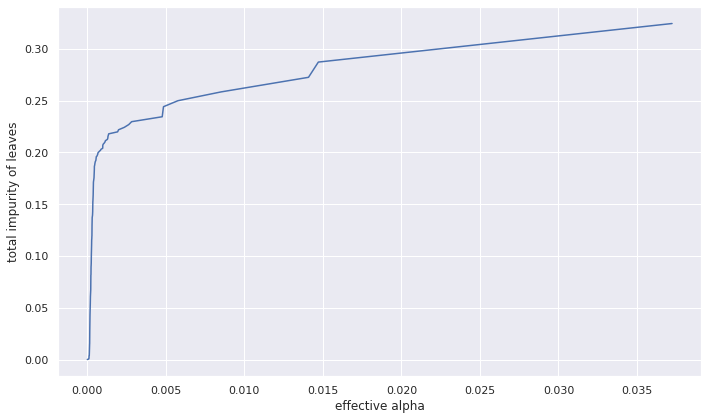

In [ ]:
clf=DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, Y_train) #computing the alpha and corresponding impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

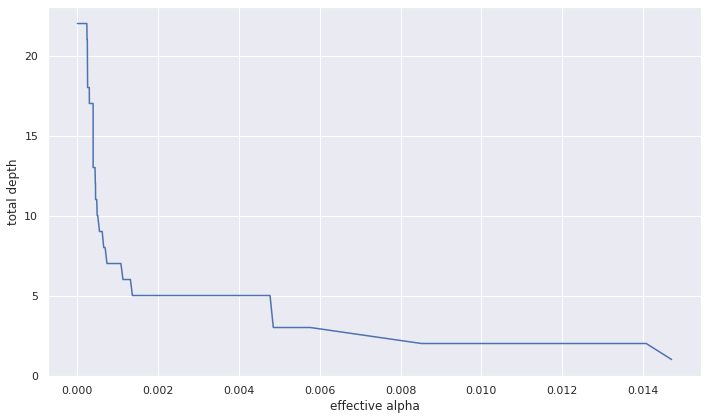

In [ ]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

As alpha increases, the depth of the tree decreases, in other words, the complexity decreases. The best point would be where the accuracy is high but the depth is relatively low

Text(0, 0.5, 'Accuracy scores')

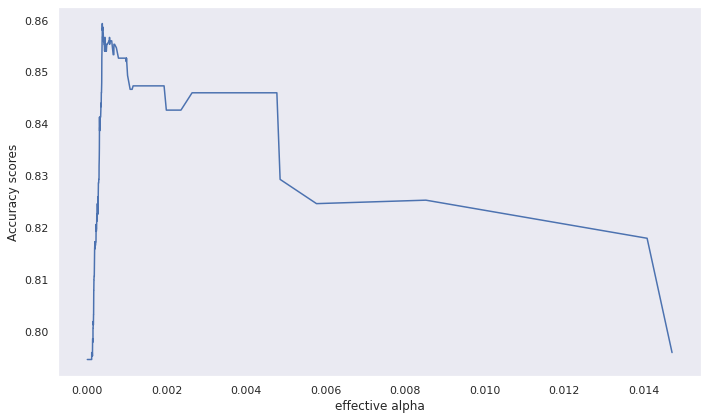

In [ ]:
acc_scores = [accuracy_score(Y_valid, clf.predict(X_valid)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1]) #removing the larger alpha - the last one
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

As seen earlier in the impurity vs alpha graph, the alpha with the highest accuracy is infact between 0 and 0.005 

[Text(0.5291193181818182, 0.9722222222222222, 'X[1] <= 0.354\ngini = 0.324\nsamples = 6000\nvalue = [4778, 1222]'),
 Text(0.30113636363636365, 0.9166666666666666, 'X[4] <= 1.647\ngini = 0.208\nsamples = 4293\nvalue = [3788, 505]'),
 Text(0.22727272727272727, 0.8611111111111112, 'X[4] <= -0.06\ngini = 0.184\nsamples = 4193\nvalue = [3764, 429]'),
 Text(0.17045454545454544, 0.8055555555555556, 'X[8] <= 0.5\ngini = 0.271\nsamples = 2058\nvalue = [1725, 333]'),
 Text(0.09090909090909091, 0.75, 'X[3] <= -0.291\ngini = 0.224\nsamples = 1551\nvalue = [1352, 199]'),
 Text(0.045454545454545456, 0.6944444444444444, 'X[10] <= 0.5\ngini = 0.358\nsamples = 389\nvalue = [298, 91]'),
 Text(0.022727272727272728, 0.6388888888888888, 'X[1] <= 0.259\ngini = 0.443\nsamples = 172\nvalue = [115, 57]'),
 Text(0.011363636363636364, 0.5833333333333334, 'gini = 0.42\nsamples = 163\nvalue = [114, 49]'),
 Text(0.03409090909090909, 0.5833333333333334, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.068181818

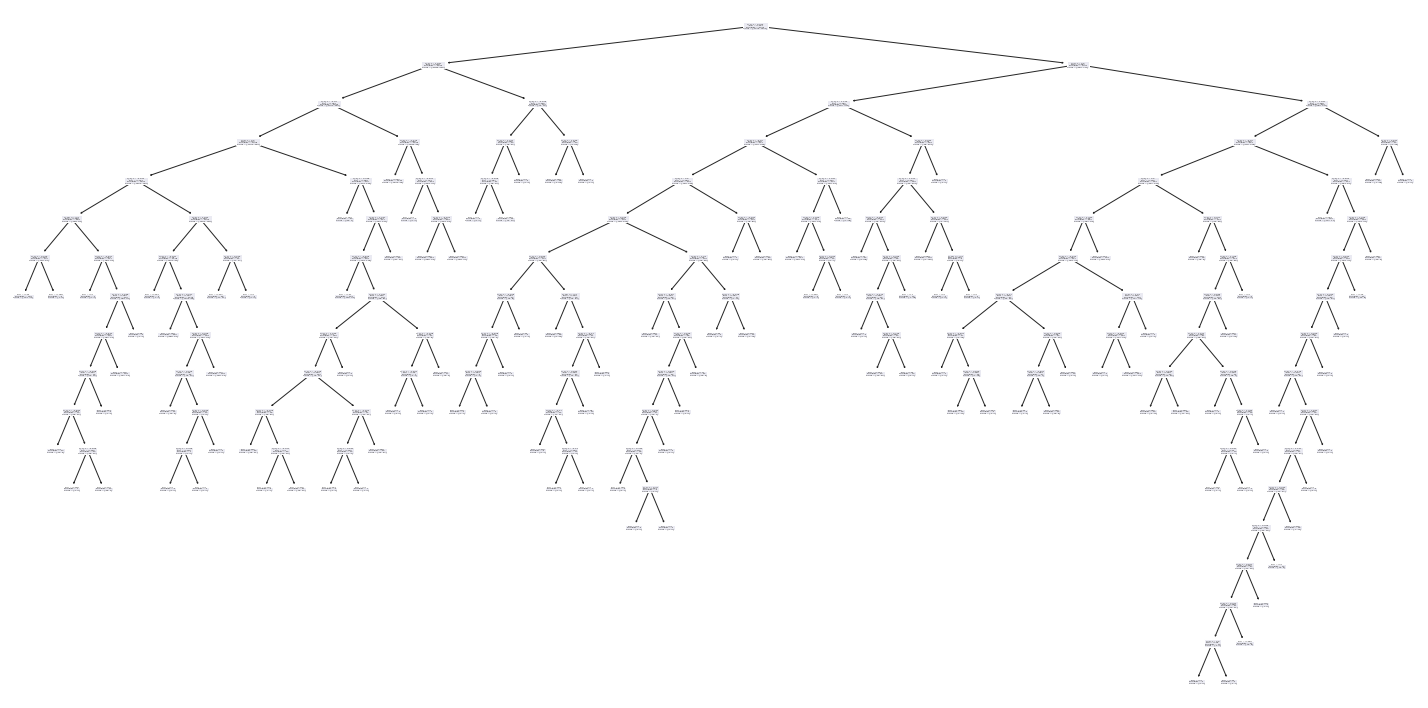

In [ ]:
final_tree = clfs[np.argmax(acc_scores)]
fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))
sk.tree.plot_tree(final_tree, ax=ax)

Here, the depth of the tree has decreased, not to a great extent perhaps beacuse the dataset is such that the decision tree model needs many splits to classify the data, and hence, may not be the best classifier for this dataset. 

In [ ]:
pd.DataFrame({'Features':X_train.columns, 'Importance': final_tree.feature_importances_}).sort_values('Importance', ascending=False)

,Features,Importance
1,Age,0.356442
4,NumOfProducts,0.231518
3,Balance,0.139047
6,IsActiveMember,0.091699
0,CreditScore,0.060124
8,Geography_Germany,0.046830
7,EstimatedSalary,0.031852
2,Tenure,0.023958
10,Gender_Male,0.013807
5,HasCrCard,0.004722


According to the pruned tree, Age, NumofProducts and Balance are the most important predictors; 2 of these were also part of the full tree before. The Decision Tree at least provides a good intuition into how features can help understand a customer's potential churn, and therefore, the stimuli for businesses to focus on for retaining customers.

In [ ]:
print('Optimised Model Alpha:', ccp_alphas[np.argmax(acc_scores)])
print('Optimised Model Depth:', tree_depths[np.argmax(acc_scores)])
print('Optimised Tree Training Accuracy:', accuracy_score(Y_train, final_tree.predict(X_train)))
print('Optimised Model Validation Accuracy:', np.max(acc_scores))

Optimised Model Alpha: 0.0003771547022924014
Optimised Model Depth: 17
Optimised Tree Training Accuracy: 0.8981666666666667
Optimised Model Validation Accuracy: 0.8593333333333333


The overfitting issue has much reduced now after pruning the tree as the difference between the training and validation accuracies is much less and validation accuracy is also much higher, despite the depth of 17.

Model's Accuracy: 0.8593333333333333
Model's Misclassification: 0.14066666666666666
Model's Specificity: 0.9522613065326633
Model's Sensitivity: 0.49673202614379086


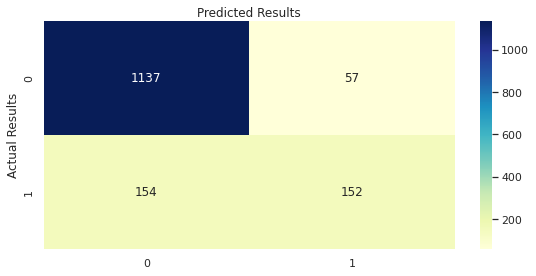

In [ ]:
# confusion matrix
Y_predict = final_tree.predict(X_valid)
c_m(Y_valid, Y_predict)

With a much improved fit and accuracy over the naive model, baseline model, and the unoptimised tree, the misclassification rate has also improved to 14% but it is still not ideal as 14/100 customers will still be incorrectly predicted. More errors are on the side of False Negatives i.e. more customers are being classified as not churning (approx 50%) than actually are churning. It is important to note that the dataset on hand is also somewhat unbalanced with 80% not churning and 20% churning observations - the model perhaps built on to this imbalance and naturally learnt to predict more people as not churning. This issue must be tackled using a more representative dataset or changing the Machine Learning approach behind it. 

In [ ]:
# record the results
df_results.loc[3] = [
                    'Decision Tree',
                    0.8593333333333333, 
                    0.14066666666666666,
                    0.9522613065326633,
                    0.49673202614379086,
                        ]
# df_results

In [ ]:
DT_df = pd.DataFrame({'Features':X_train.columns, 'Importance': final_tree.feature_importances_}).sort_values('Importance', ascending=False)
# rename DT_df
DT_df.columns = ['variable_name', 'DT_Importance']
DT_df

df_varaible['DT_Importance'] = 0
# feature_scores to dataframe
df_feature_scores_list = DT_df['variable_name'].tolist()

for i in range(len(df_feature_scores_list)):
    df_varaible.loc[df_varaible['variable_name']==f"{df_feature_scores_list[i]}",'DT_Importance'] = DT_df['DT_Importance'][i]

# df_varaible

## 6.2. Random Forest Model

A systematic random forest classifier modelling approach including baseline model building, fine tuning and final model building was applied. Firstly, an unoptimized random forest classifier was designed to be used as a baseline for comparison with the optimized classifiers. The base random forest model has an overall accuracy of about 85.5% and a miscalssification of about 14.5%. A randomized search was then used to find the optimal parameters for the classifier, given that the hyperparameter search space is large and randomized search provides more control over the computing budget. The optimal parameters for the random forest classifier were found to be the following:

* 'min_samples_split': 5

* 'min_samples_leaf': 2

* 'max_features': 'auto'

* 'max_depth': 110,

* 'criterion': 'gini'

* 'bootstrap': True
  
A new classifier was then created with the optimal parameters. It showed slight improvement on all the metrics compared with the previous model. improving accuracy to 86.13% and reducing misclassification rate to 12.34%. Notably, the optimzied model's specificity and sensitivity increased to 87.7% and 75.2% respectively, which is significant since mistakenly classifying a customer as a churner can be very costly to the company. Furthermore, feature importance analysis indicates age (27%), number of products(15%), balance(13%) and estimated salary(12%) as well as credit score(11%) are the top five most important features for the model.

Unoptimised Tree Accuracy
Model's Accuracy: 0.8546666666666667
Model's Misclassification: 0.14533333333333334
Model's Specificity: 0.8691376701966718
Model's Sensitivity: 0.7471910112359551


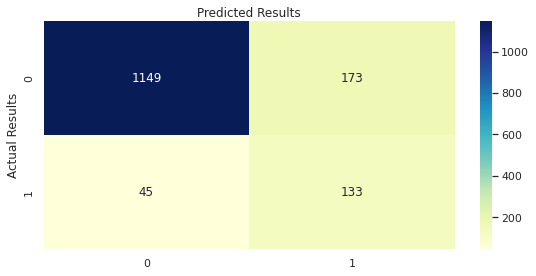

In [ ]:
# ---+ step 1 build an unpotimised model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, Y_train)
print('Unoptimised Tree Accuracy')
# get the confusion matrix
y_pred = rf.predict(X_valid)   
print('==================')
c_m(y_pred, Y_valid) 

In [ ]:
# ---+ step 2 define a grid of parameters to search over
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 11)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in  np.linspace(start = 1, stop = 110, num = 12)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
# purity of the leaf nodes

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

# print out the random grid
pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [1, 2, 5, 10],
 'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


In [ ]:
# ---+ step 3 use the grid to search for best model
# create the base model to tune
rf = RandomForestClassifier(random_state=0)
# random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 4)
# fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 5, 10],
                                        'n_estimators': [1, 10, 20, 30, 40, 50,
                                                         60, 70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [ ]:
# ---+ step 4 get the best parameters
rf_random.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 80}

In [ ]:
# ---+ step 5 apply the best parameters to the model
rf = RandomForestClassifier(random_state=0, 
                            n_estimators=50, 
                            max_depth=110, 
                            min_samples_split=5, 
                            min_samples_leaf=2, 
                            bootstrap=True, 
                            max_features='auto', 
                            criterion='gini')
rf.fit(X_train, Y_train)
print('Optimised Tree Accuracy:', accuracy_score(Y_valid, rf.predict(X_valid)))

Optimised Tree Accuracy: 0.8613333333333333


In [ ]:
# ---+ step 6 get feacture importance
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Age                  0.272135
NumOfProducts        0.150355
Balance              0.134039
EstimatedSalary      0.120361
CreditScore          0.118656
Tenure               0.069630
IsActiveMember       0.052281
Geography_Germany    0.034205
Gender_Male          0.020743
HasCrCard            0.015929
Geography_Spain      0.011667
dtype: float64

Model's Accuracy: 0.8613333333333333
Model's Misclassification: 0.13866666666666666
Model's Specificity: 0.877488514548239
Model's Sensitivity: 0.7525773195876289


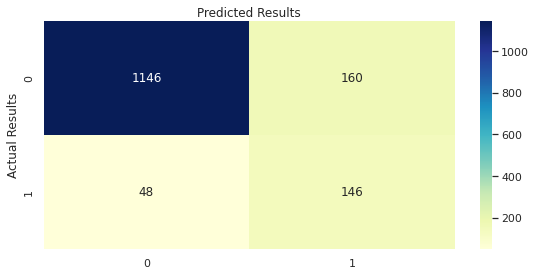

In [ ]:
# ---+ step 7 get the confusion matrix
y_pred_val = rf.predict(X_valid)   
print('==================')
c_m(y_pred_val, Y_valid)

In [ ]:
# ---+ step 8 add the results to the df_results
df_results.loc[1] = [
                    'Random Forest',
                    metrics.accuracy_score(Y_valid,y_pred_val),
                    (1-metrics.accuracy_score(Y_valid,y_pred_val)),
                    0.877488514548239,
                    0.7525773195876289
                        ]
# df_results

In [ ]:
# Variable importance in Random Forest model
df_varaible['var_imp_RF'] = 0
# feature_scores to dataframe
df_feature_scores = pd.DataFrame(feature_scores)
df_feature_scores.reset_index(inplace=True)
df_feature_scores.columns = ['variable_name', 'var_imp_RF']
df_feature_scores_list = df_feature_scores['variable_name'].tolist()

for i in range(len(df_feature_scores_list)):
    df_varaible.loc[df_varaible['variable_name']==f"{df_feature_scores_list[i]}",'var_imp_RF'] = df_feature_scores['var_imp_RF'][i]

# df_varaible

## 6.3. Gradient Boosting Classifier

Gradient Boosting Classifier is one of the variants of enseble methods which create multiple weak classification models -- in our case decision trees--and combine their results to get better overall performace. Here, a baseline model of the classifier will be created, fine-tuned and optimized in order to perform comparisons between the models' predictive power. 

Model's Accuracy: 0.858
Model's Misclassification: 0.142
Model's Specificity: 0.8685199098422239
Model's Sensitivity: 0.7751479289940828


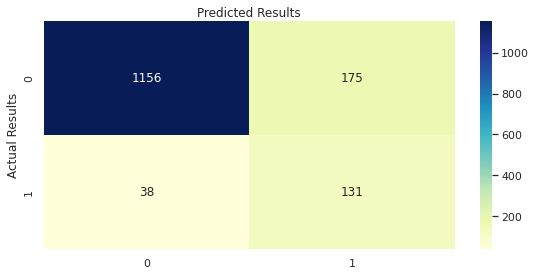

In [ ]:
# Creating the baseline model of Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=0)
# Fit the model
gb.fit(X_train, Y_train)
# Use the model to predict
y_pred = gb.predict(X_valid)   
print('==================')
c_m(y_pred, Y_valid)           

It can be seen that the baseline model doesn't seem to overfit the training set and it's accuracy is the second highest after KNN classifier. However, 82% of missclassifications appeared to fall into False Positive and only 18% on False Negative meaning that most of the cases (78%) of exited customers was captured by the classifier. So in order to improve this classification results, cross validation grid search was applied in order to find the best hyperparameters for the model.

The examined hyperparameters are the following:
- Learning rate : (or shrinkage) Scaler of the results of each used tree
- n_estimators : Number of trees that the model uses in order to provide the predictions
- max_features : Number of features of the dataset used from each tree to predict the label feature

In [ ]:
# Initialize the initial model
gb = GradientBoostingClassifier(random_state=0)

# Create the ranges of the parameters to tune
tuned_parameters = [
    {'learning_rate' : [1, 0.5, 0.1, 0.05, 0.01],
     'n_estimators' : [8,16,32,64,100,200],
     'max_features' : list(range(4, X_train.shape[1]))
    } 
]

# Define the scores
scores =['accuracy']   #,'precision','recall']

# Creating the instance of the cross validation
for score in scores:
    clf = GridSearchCV(gb, tuned_parameters, scoring=score, cv=5)
    clf.fit(X_train, Y_train)

print('''
Best parameters set found on development set:
=============================================
''')
print(clf.best_params_)



Best parameters set found on development set:

{'learning_rate': 0.05, 'max_features': 7, 'n_estimators': 200}


It can be seen that the optimal hyper parameters of the model are the following:

- learning rate: 0.05
- max_features : 7
- n_estimators : 200

So a smaller learning rate will be applied in the trade off a bigger number of trees created, which is diserable based on empirical results founded in literacure, which states that small values of shrinkage (s <= 0.1) lead to much better generalization error. 

Source: https://jerryfriedman.su.domains/ftp/stobst.pdf

Model's Accuracy: 0.8586666666666667
Model's Misclassification: 0.14133333333333334
Model's Specificity: 0.8697289156626506
Model's Sensitivity: 0.7732558139534884


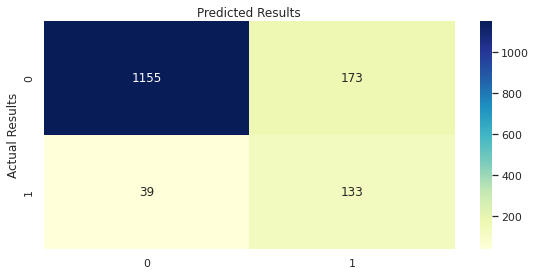

In [ ]:
# Initialize the optimal model
gb_best = GradientBoostingClassifier(learning_rate= 0.05, max_features= 7, n_estimators =200, random_state=0)

# Fit the model
gb_best.fit(X_train, Y_train)
# Use the model to predict
y_pred = gb_best.predict(X_valid)    
print('==================')
c_m(y_pred, Y_valid)                 

After optimising the model, the accuracy remain unchanged compared to the baseline model with slight improvement in misclassification. Still, the majority of misclassified cases appeared at False Positive side of the confusion matrix with a slight decrease in the correct predictions of exited clients. 

In [ ]:
# Display the importance of each selected feature
variables = pd.DataFrame({'Features': list(X_train.columns) , 'Importance': list(gb_best.feature_importances_)})
variables
variables.columns = ['variable_name', 'GB_Importance']
variables

,variable_name,GB_Importance
0,CreditScore,0.020940
1,Age,0.378898
2,Tenure,0.006704
3,Balance,0.075038
4,NumOfProducts,0.312263
5,HasCrCard,0.001341
6,IsActiveMember,0.109708
7,EstimatedSalary,0.017746
8,Geography_Germany,0.060635
9,Geography_Spain,0.000343


Lastly, with regards to variable importance, it can be observed that the age and number of bank products used by the customer are the main factors driving the classification, followed by the customer's active member status.

In [ ]:
# record the results
df_results.loc[4] = [
                    'Gradient Boosting',
                    0.8586666666666667,
                    0.14133333333333334,
                    0.8697289156626506,
                    0.7732558139534884
                        ]
df_results

,model,accuracy_valid,Misclassification,Specificity,Sensitivity
0,Logistic Regression,0.636000,0.364000,0.604690,0.758170
1,Random Forest,0.861333,0.138667,0.877489,0.752577
2,SVM,0.848667,0.151333,0.970687,0.372549
3,KNN,0.838667,0.161333,0.974874,0.307190
4,Gradient Boosting,0.858667,0.141333,0.869729,0.773256


In [ ]:
df_varaible['GB_Importance'] = 0
# feature_scores to dataframe
df_feature_scores_list = variables['variable_name'].tolist()

for i in range(len(df_feature_scores_list)):
    df_varaible.loc[df_varaible['variable_name']==f"{df_feature_scores_list[i]}",'GB_Importance'] = variables['GB_Importance'][i]

df_varaible

,variable_name,coef_logm,var_imp_RF,DT_Importance,GB_Importance
0,CreditScore,-0.060375,0.118656,0.231518,0.020940
1,Age,0.737771,0.272135,0.060124,0.378898
2,Tenure,-0.038241,0.069630,0.031852,0.006704
3,Balance,0.175221,0.134039,0.023958,0.075038
4,NumOfProducts,-0.063895,0.150355,0.356442,0.312263
5,HasCrCard,-0.065844,0.015929,0.000000,0.001341
6,IsActiveMember,-1.012519,0.052281,0.139047,0.109708
7,EstimatedSalary,0.026367,0.120361,0.091699,0.017746
9,Geography_Spain,0.078967,0.011667,0.013807,0.000343
10,Gender_Male,-0.546379,0.020743,0.046830,0.016385


## 6.4. SVM Model

Support Vector Machine: It is a very powerful algorithm. 
SVM is introduced as a classifier based on logistic regression. The learning method entails mapping the data to a high-dimensional space so it isbsparse,  which facilitates finding a segmentation surface to classify the data. This high-dimensional segmentation surface is the 'hyperplane'. 
Mathematically, the optimization goal is to maximize the distance between the dividing line in the middle and the edge of the two classes of data; this is solved using the Lagrangian dual model.

We create a benchmark SVM model and obtain the baseline accuracy and confusion matrix to see whether we could improve (the chosen kernel is linear)
1. The precision in predicting 0 is 0.80 and the overall accuracy is 80%
2. But the precision in predicting 1 is 0

It turns out that the classification results only appear in specific categories, so the model must be revised. We used grid search to find the best parameters (C, gamma) that improve the model's accuracy.

GridSearchCV is a meta-estimator with an estimator in the parameters, like SVC. The point is that a new estimator will be created, but behave exactly the same. When estimator=SVC, it is used as a classifier and Verbose can be set to any integer; it just means that the higher the number, the more textual explanation. 

After finding best_estimator_ with the SVC(C=1000, gamma=0.01), the model was fitted with the validation dataset with the following results:
1. Accuracy of 84.87%
2. Higher Sensitivity (predicting 1) of 0.372, which is higher than the baseline model but still unsatisfactory.

While both the SVM models here comprised a linear kernel, perhaps a better accuracy and sensitivity could be obtained using another kernel (poly, rbf, or sigmoid).

Note that when using GridSearchCV, there's no feature_importance that you can print out.

Benchmarking model of SVM

In [ ]:
# benchmarking SVM
svm_model = svm.SVC(kernel='linear',
                     C=1, 
                     gamma='auto',
                      random_state=42)
scores = cross_val_score(svm_model, X_train, Y_train, cv=10)
# scores
print("==================")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# predict the valid set
svm_model = svm.SVC(kernel='linear',
                 gamma='auto', 
                 C=1, 
                 random_state=42).fit(X_train, Y_train)
svm_model.score(X_valid, Y_valid)

# predict on the validation set
predictions = svm_model.predict(X_valid)


# imoort classification report & confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("==================")
print(confusion_matrix(Y_valid,predictions))
print('\n')
print(classification_report(Y_valid,predictions))

0.80 accuracy with a standard deviation of 0.00
[[1194    0]
 [ 306    0]]


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1194
           1       0.00      0.00      0.00       306

    accuracy                           0.80      1500
   macro avg       0.40      0.50      0.44      1500
weighted avg       0.63      0.80      0.71      1500



Parameter tuning

In [ ]:
# It turns out that the classification results only appear in specific categories, so the model needs to be revised
# using GridSearchCV
# kernel = 'linear', 'poly', 'rbf', 'sigmoid', for GridSearchCV we don't specific it out
# C (penalty): the defult is 1
# higher C means less regularization, but lower will be too overfitted
# gamma (kernel coefficient): the default is 1/n_features
# ’scale’: 1/ (n_features * (n_features + 1) / 2) (default)
# ’auto’: 1/n_features if n_features > 1, otherwise 1

svm_model_modify = SVC(kernel = 'linear') # first build the model before the parameters are adjusted
svm_model_modify.fit(X_train,Y_train)

from sklearn.model_selection import GridSearchCV
# GridSearchCV is to build a dictionary to combine the parameters to be tested
param_grid = {
        'C':[0.1,1,10,100,1000],
        'gamma':[1,0.1,0.01,0.001,0.0001],
        }
        
# GridSearchCV is a meta-estimator with an estimator in the parameters, like SVC.
# The point is that a new estimator will be created, but behave exactly the same
# when estimator=SVC, it is used as a classifier
# Verbose can be set to any integer, it just means that the higher the number, the more textual explanation
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [ ]:
# Use the parameters just set to find the most suitable model
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.797 total time=   1.5s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.797 total time=   1.5s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.797 total time=   1.5s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.796 total time=   1.5s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.796 total time=   1.5s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.819 total time=   0.8s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.812 total time=   0.8s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.815 total time=   0.8s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.819 total time=   0.8s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.813 total time=   0.8s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.797 total time=   0.8s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [ ]:
# Display the best estimator parameters
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [ ]:
# Re-predict the valid set using the best reference just now
grid_predictions_val = grid.predict(X_valid)

# Assess how good or bad the predictions are for the new reference
print(confusion_matrix(Y_valid,grid_predictions_val))
print('\n')
print(classification_report(Y_valid,grid_predictions_val))

[[1159   35]
 [ 192  114]]


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1194
           1       0.77      0.37      0.50       306

    accuracy                           0.85      1500
   macro avg       0.81      0.67      0.71      1500
weighted avg       0.84      0.85      0.83      1500



Model's Accuracy: 0.8486666666666667
Model's Misclassification: 0.15133333333333332
Model's Specificity: 0.9706867671691792
Model's Sensitivity: 0.37254901960784315


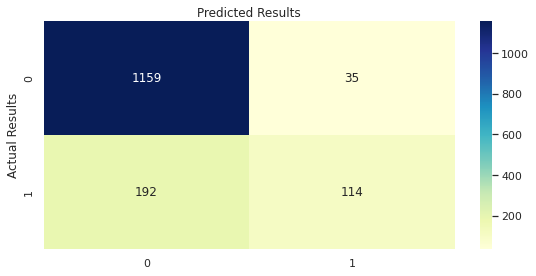

In [ ]:
c_m(Y_valid, grid_predictions_val)

In [ ]:
# add the results to the df_results
df_results.loc[2] = [
                    'SVM',
                    0.8486666666666667,
                    0.15133333333333332,
                    0.9706867671691792,
                    0.37254901960784315
                        ]
# df_results


## 6.5. kNN model

The fourth model trialled was a k-nearest neighbors (knn) classifier. 
- The baseline model with default k=5 yielded an accuracy of 87.70% for the training set, which is significantly higher than the validation set accuracy of 83.47%. This signifies an overfitting issue in the model.
- Using 10-fold cross validation, the optimal k was found to be 15 neighbours.
- The knn model with optimal k yielded a training accuracy of 84.07% and a validation accuracy of 83.87% signifying that the optimized model outperforms the baseline model by reducing the overfitting.
- The knn model outperforms the baseline logistic regression model with a higher accuracy, lower misclassification rate, and higher specificity. However, it underperforms with a lower sensitivity. 
- Going back to the business problem, a high true positive rate i.e. sensitivity is preferred as it implies more correctly predicted at-risk customers; allowing the bank to intervene in a timely manner to prevent their exit. Thus, despite its good prediction accuracy, the low sensitivity achieved by this knn model implicates an issue.

In [ ]:
# Creating the baseline KNN model without any tuning.
# By default k = 5
# Training set accuracy (baseline KNN model)
KNN_model_default = KNeighborsClassifier()
KNN_model_default.fit(X_train, Y_train)
y_pred =KNN_model_default.predict(X_train)
train_accuracy=accuracy_score(Y_train,y_pred)*100
print("Accuracy for our training dataset without tuning is : {:.2f}%".format(train_accuracy))

Accuracy for our training dataset without tuning is : 87.70%


In [ ]:
# Creating the baseline KNN model without any tuning.
# By default k = 5

KNN_model_default = KNeighborsClassifier()
KNN_model_default.fit(X_train, Y_train)
y_pred =KNN_model_default.predict(X_valid)
test_accuracy=accuracy_score(Y_valid,y_pred)*100
print("Accuracy for our validation dataset without tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our validation dataset without tuning is : 83.47%


Model's Accuracy: 0.8346666666666667
Model's Misclassification: 0.16533333333333333
Model's Specificity: 0.949748743718593
Model's Sensitivity: 0.38562091503267976


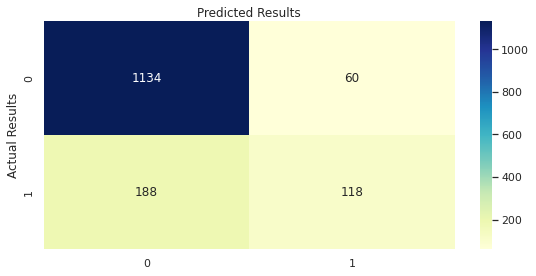

In [ ]:
# Visualise confusion matrix for baseline knn model
c_m(Y_valid, y_pred)

In [ ]:
# Optimized kNN model
# Use 10-fold cross-validation to find optimal K.
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
#optimal k
print(grid_search.best_params_)

{'n_neighbors': 15}


In [ ]:
# training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 84.07%


In [ ]:
# kNN with k=15
from sklearn.metrics import plot_confusion_matrix
knn = KNeighborsClassifier(n_neighbors= 15)

knn.fit(X_train, Y_train)

y_pred=knn.predict(X_valid) 

test_accuracy=accuracy_score(Y_valid,y_pred)*100

print("Accuracy for our validation dataset with tuning is: {:.2f}%".format(test_accuracy))


Accuracy for our validation dataset with tuning is: 83.87%


Model's Accuracy: 0.8386666666666667
Model's Misclassification: 0.16133333333333333
Model's Specificity: 0.9748743718592965
Model's Sensitivity: 0.30718954248366015


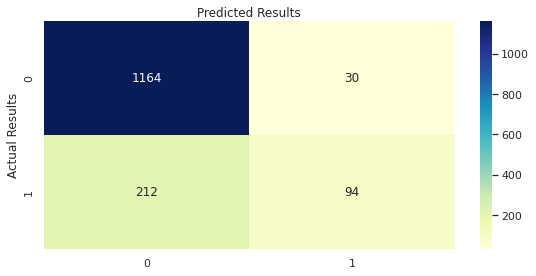

In [ ]:
c_m(Y_valid, y_pred)

In [ ]:
# record the results
df_results.loc[3] = [
                    'KNN',
                    0.8386666666666667,
                    0.16133333333333333,
                    0.9748743718592965,
                    0.30718954248366015, 
                        ]
# df_results

# 7. Recording Final Classifier Accuracies

- Upon comparing different performance metrics accross the 6 supervised machine learning models, we decide to proceed with the random forest model. The random performance model outperforms the other models on validation accuracy (86.13%), specificity (87.74%) and misclassification rate (13.87%). Gradient boosting achieves a merely higher sensitivity, though the difference is insignificant. 


In [ ]:
df_results

,model,accuracy_valid,Misclassification,Specificity,Sensitivity
0,Logistic Regression,0.636000,0.364000,0.604690,0.758170
1,Random Forest,0.861333,0.138667,0.877489,0.752577
2,SVM,0.848667,0.151333,0.970687,0.372549
3,KNN,0.838667,0.161333,0.974874,0.307190
4,Gradient Boosting,0.858667,0.141333,0.869729,0.773256


## 7.1 Choosing and retraining the best Machine Learning model and predicting on the test set


With the rationale that machine learning models learn better with more training data, the optimised random forest depicted in section 6.2 was initialised and trained on a combined set (training + validation set) that comprises 75% of the data. The trained model was finally used to predict the test set instances and the results are outlined below.

# Final Model: Random Forest

In predicting test instances, the final model achieved an accuracy of 86.8%, a misclassification error rate of 13.2% and specificity of 96.6%.
The main reason why the model had lower sensitivity is the imbalance of the two classes in the dataset. Due to this, the model tended to predict more accurately remaining clients while failing almost half of the time in predicting exiting ones.


In [ ]:
# Examine the size of train and validation sets
print('X_train:', X_train.shape)
print('X_valid:', X_valid .shape)
print('Y_train:', Y_train.shape)
print('Y_valid:', Y_valid .shape)
print('')

# Combine the training and validation sets
X_train_full = pd.concat([X_train, X_valid])
Y_train_full = pd.concat([Y_train, Y_valid])

# Examine the size of the final dataset 
print('X_train_full:', X_train_full.shape)
print('Y_train_full:', Y_train_full .shape)

X_train: (6000, 11)
X_valid: (1500, 11)
Y_train: (6000,)
Y_valid: (1500,)

X_train_full: (7500, 11)
Y_train_full: (7500,)


Model's Accuracy: 0.868
Model's Misclassification: 0.132
Model's Specificity: 0.9658463083877449
Model's Sensitivity: 0.48526522593320237


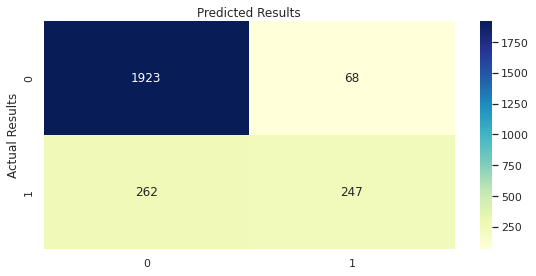

In [ ]:
# Initialise the best model
rf_final = RandomForestClassifier(random_state=0, 
                            n_estimators=50, 
                            max_depth=110, 
                            min_samples_split=5, 
                            min_samples_leaf=2, 
                            bootstrap=True, 
                            max_features='auto', 
                            criterion='gini')

# Fiting the best model
rf_final.fit(X_train_full, Y_train_full)

# Predict the cases of the test set
Y_pred = rf_final.predict(X_test)

# Visualising the confusion matrix
c_m(Y_test, Y_pred)

# 8. Deep Learning

## 8.1. Basic FF NN

An unoptimised neural neural network model was built in order to contextualise the data and make valid comparison against the tuned model. The stucture of the model is shown below:
1. An input layer including arbitrarily chosen number of 100 neurons with the relu activation function (Negative values are ignored, the range of Y is limited to [0, ∞])
2. The output layer is set with a sigmoid activation function in order to predict the 1 and 0 (Exited or not)


Adjusting the learning rate is a key element in training a good model.
1. If the learning rate is too low, it means that a very small weight update is performed on the neural network, which makes its training relatively slow; if the learning rate is too high, this may cause loss to oscillate and therefore, hinder convergence.
2. The learning rate is just a parameter for training the model during the gradient descent process.

In our baseline model, we have not specified the optimizer (SGD or ADAM), nor the exact value of the learning rate.


In [ ]:
# clean sessions and set random seeds
tf.keras.backend.clear_session()
np.random.seed(231)
tf.random.set_seed(631)

In [ ]:
# create tensorflow model

model_benchmarking = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(100, kernel_initializer = 'uniform',activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1, kernel_initializer = 'uniform', activation="sigmoid")
    ])

model_benchmarking.compile(loss="binary_crossentropy",
              metrics=["accuracy"])

# keep track of the performance
log = model_benchmarking.fit(X_train, Y_train, 
                epochs=100, 
                validation_data=(X_valid, Y_valid),
               )


Epoch 1/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4852 - accuracy: 0.7962 - val_loss: 0.4374 - val_accuracy: 0.8040
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 0.4099 - accuracy: 0.8260 - val_loss: 0.4147 - val_accuracy: 0.8207
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3860 - accuracy: 0.8425 - val_loss: 0.3961 - val_accuracy: 0.8333
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3699 - accuracy: 0.8505 - val_loss: 0.3799 - val_accuracy: 0.8413
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3595 - accuracy: 0.8533 - val_loss: 0.3730 - val_accuracy: 0.8360
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3539 - accuracy: 0.8563 - val_loss: 0.3664 - val_accuracy: 0.8453
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3507 - accuracy: 0.8592 - val_loss: 0.3613 - val_accuracy: 0.8473

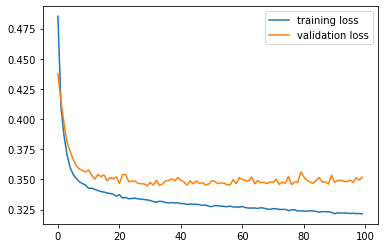

In [ ]:
# visualise the loss
plt.plot(log.history['loss'],label = "training loss")
plt.plot(log.history['val_loss'], label = "validation loss")
plt.legend()
plt.show()

The baseline neural network shows a massive overfitting issue. The validation loss deflects away from the training loss with highly fluctuating results. Initialising with 100 neurons may not be the best approach, so the high number of parameters may be contributing to overfitting.

We can try optimising the various parameters to attain a more reliable neural network to predict customer churn.

In [ ]:
# make prediction on valudation set
Y_valid_prob = model_benchmarking.predict(X_valid)
Y_pred_val = [1 if x>=0.5 else 0 for x in Y_valid_prob]

Model's Accuracy: 0.8493333333333334
Model's Misclassification: 0.15066666666666667
Model's Specificity: 0.9422110552763819
Model's Sensitivity: 0.4869281045751634


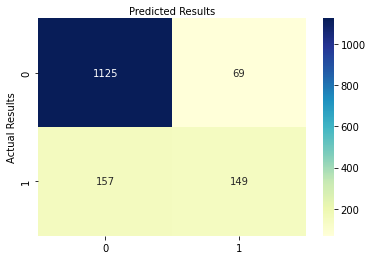

In [ ]:
# build confusion matrix
c_m(Y_valid, Y_pred_val)

## 8.2. Hyperparameter tuning - Keras Tuner
Building on the basic neural network, we used the keras tuner to optimize the model hyperparameters and produce a neural network with improved performance.

The following hyperparameters were tuned:
- size of the input and 2 hidden layers (between 30 and 70; 20 and 40; and 5 and 20 respectively.)
- dropout rate (between 0.1 and 0.2)
- optimizer (SGD or Adam)
- learning rate (between 0.0001 and 0.01)

The model was built with the optimized hyperparameters, fitted to the training data and trained for 100 epochs. 


In [ ]:
# clear cache and set seeds
tf.keras.backend.clear_session()
np.random.seed(231)
tf.random.set_seed(631)

In [ ]:
# build a hyper parameter function to tune the parameters
def train_model_hp(hp):
  
    model = tf.keras.models.Sequential()

    # tune 1st layer  
    model.add(tf.keras.layers.Dense(units=hp.Int("1st_layer_units", min_value=30, max_value=70), 
      kernel_initializer = 'uniform',
      activation="relu", 
      input_shape=X_train.shape[1:]))

    # tune 1st drop out rate
    model.add(tf.keras.layers.Dropout(rate=hp.Float('1st_dropout_rate', min_value = 0.1, max_value=0.2)))

    # tune 2nd layer 
    model.add(tf.keras.layers.Dense(units=hp.Int(f"2nd_num_units", min_value = 20, max_value=40), activation='relu'))

    # tune 2nd drop out rate
    model.add(tf.keras.layers.Dropout(rate=hp.Float('2nd_dropout_rate', min_value = 0.1, max_value=0.2)))

    # tune 3rd layer 
    model.add(tf.keras.layers.Dense(units=hp.Int(f"3rd_num_units", min_value = 5, max_value=20), activation='relu'))
            
    # add output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # define a choice of optimizer 
    optim_algo = hp.Choice('optimizer', values=['sgd','adam'])
    # define the range of learning rate 
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling="log")

    # tune wether to use sgd or adam optimizer 
    if optim_algo == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate,clipvalue=1)
    elif optim_algo == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # compile the model   
    model.compile(  optimizer=optimizer,
                    # add loss function, in this case, the result will be binary 
                    loss='binary_crossentropy',
                    # define metrics to show 
                    metrics=["accuracy"])

    return model

train_model_hp(kt.HyperParameters())

In [ ]:
# create tuner
tuner = kt.Hyperband(train_model_hp,
                     # set an obejective of minimise loss
                     objective='val_accuracy',
                     max_epochs=70,
                     factor=3,
                     seed=235,
                     directory='tsrddccxxxgddyd'
                    )

The purpose of early stopping is to go back to a checkpoint of minimum validation loss and avoid overfitting the training dataset. If the loss stops decreasing for several consecutive epochs, the training will stop. We didn't use early stopping in the baseline model to be able to first observe the valiadation and training losses. With the tuner optimising the paramenters, including learning rate, we add  early_stopping_cb in the kreas tuner part to try to improve the model. 

In [ ]:
# find the best values
tuner.search(X_train, 
             Y_train,
             epochs=50, 
             # val_loss
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)],
             validation_data=(X_valid,Y_valid)
             )

Trial 90 Complete [00h 00m 09s]
val_accuracy: 0.7960000038146973

Best val_accuracy So Far: 0.8633333444595337
Total elapsed time: 00h 16m 26s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'1st_layer_units': 56, '1st_dropout_rate': 0.15646032330638285, '2nd_num_units': 24, '2nd_dropout_rate': 0.14099643207455653, '3rd_num_units': 5, 'optimizer': 'adam', 'learning_rate': 0.0024961712096001933, 'tuner/epochs': 24, 'tuner/initial_epoch': 8, 'tuner/bracket': 3, 'tuner/round': 2, 'tuner/trial_id': '0035'}


In [ ]:
# clean sessions and set seeds
tf.keras.backend.clear_session()
np.random.seed(231)
tf.random.set_seed(631)

In [ ]:
# create the best model
model_modify = tuner.hypermodel.build(best_hps)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

#create another model
log_modify = model_modify.fit(X_train, Y_train,
               epochs=50,
              # shuffle=True,
              # 64,128 with 10 patience is good
               batch_size=72,
               validation_data=(X_valid,Y_valid),
                callbacks=[early_stopping_cb])


Epoch 1/50
84/84 [==============================] - 1s 5ms/step - loss: 0.5064 - accuracy: 0.7748 - val_loss: 0.4270 - val_accuracy: 0.8033
Epoch 2/50
84/84 [==============================] - 0s 4ms/step - loss: 0.3942 - accuracy: 0.8270 - val_loss: 0.3810 - val_accuracy: 0.8313
Epoch 3/50
84/84 [==============================] - 0s 4ms/step - loss: 0.3696 - accuracy: 0.8450 - val_loss: 0.3774 - val_accuracy: 0.8307
Epoch 4/50
84/84 [==============================] - 0s 3ms/step - loss: 0.3633 - accuracy: 0.8482 - val_loss: 0.3679 - val_accuracy: 0.8407
Epoch 5/50
84/84 [==============================] - 0s 3ms/step - loss: 0.3566 - accuracy: 0.8548 - val_loss: 0.3689 - val_accuracy: 0.8347
Epoch 6/50
84/84 [==============================] - 0s 4ms/step - loss: 0.3539 - accuracy: 0.8527 - val_loss: 0.3565 - val_accuracy: 0.8487
Epoch 7/50
84/84 [==============================] - 0s 3ms/step - loss: 0.3547 - accuracy: 0.8550 - val_loss: 0.3589 - val_accuracy: 0.8480
Epoch 8/50
84/84 [==

In [ ]:
model_modify.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 56)                672       
                                                                 
 dropout (Dropout)           (None, 56)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                1368      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 125       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 2,171
Trainable params: 2,171
Non-trainabl

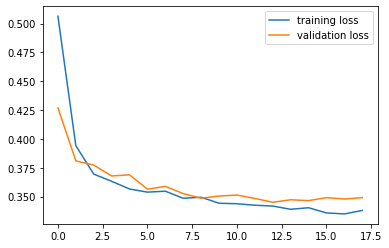

In [ ]:
# visualise the loss
plt.plot(log_modify.history['loss'],label = "training loss")
plt.plot(log_modify.history['val_loss'], label = "validation loss")
plt.legend()
plt.show()

In [ ]:
# make prediction on valudation set
Y_valid_prob = model_modify.predict(X_valid)
Y_pred_val = [1 if x>=0.5 else 0 for x in Y_valid_prob]

Model's Accuracy: 0.8613333333333333
Model's Misclassification: 0.13866666666666666
Model's Specificity: 0.9690117252931323
Model's Sensitivity: 0.4411764705882353


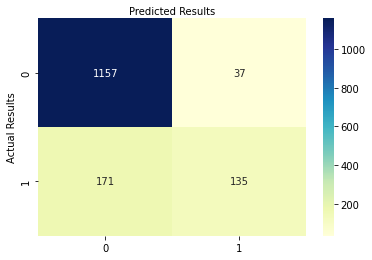

In [ ]:
# build confusion matrix
c_m(Y_valid, Y_pred_val)

The achieved accuracy and misclassification rate are slightly better than the basic neural network. It also  outperforms the naive and baseline models and some classifiers with its validation accuracy (86.13%).

The non-exited class is still being over-represented in the final predictions, despite evident customers exiting. This misclassification of the exited class would be a costly disadvantage to any banking business. 

The overfitting issue has been alleviated to some extent, however, the model can definitely be tuned more to increase the accuracy as well as decreasing overfitting using other regularisation techniques. The training dataset size (around 7000) observations puts limitations on attaining a higher accuracy. The rationale here is that learning in neural networks benefits from larger datasets. Furthermore, the neural network offers no insights into the features' impact on predictions. Consequently, besides classification, insights into variable importance cannot be obtained. For these reasons, we proceeded with a supervised machine learning classifier.

# 9. Conclusion: Machine Learning vs Deep Learning

Both the approaches to classification have rendered comparable improvements over the baseline model. However, in the interest of explanability, computational load, and of course accuracy, classical Machine Learning models seem more favourable for adoption. Neural Networks may have a higher performance especially when the training data is of a considerable size, something this analysis can further benefit from. 

Moreover, when using deep learning or machine learning for classification, the models are as good as the training data, which must have the best representation of the features existing in the population. Therefore, a “balanced” dataset – i.e. when the number of observations belonging to each of the classes are of similar order of magnitude - is highly desirable. Unfortunately, this is often not the case in data collection.
In our models, the class imbalance was detected and that affected the results most of the time. Consequently. "Sensitivity" was not very high since 0 class (Not Exited) comprised 7963 observations while 1 class (Exited) comprised 2037 observations only.
Nevertheless, we want to create a model that helps the banks optimise their customer targeting strategies to increase retention. To address the class imbalance, we may consider two options: \
i. SMOTE: synthetically simulating new data to make the dataset more balanced. \
ii. Auto-Encoder: to train model solely on “normal” or majority class observations (not churning) and applying it to distinguish reconstruction errors made on the minority class – a form of anomaly detection.

# 10. Business Implications

The purpose of this analysis was to determine the factors that were influencing customer churn for a designated bank, and therefore to build a model to predict if a customer will churn or not based on these factors. After trialling various classification models, some differences can be observed across models with regards to variable importance. A similar pattern is evident however, with greater importance allocated to age, number of products, credit score, and estimated salary. Accordingly, the bank must pay special attention to these attributes accross their whole customer base. Our random forest classifier provides a product that can be used by the bank on a frequent basis, to more efficiently target customers with loyalty programs and retention strategies. Some additional features, especially those pertaining to customer activity/interaction, such as frequency of transaction, or number of customer support tickets raised can be integrated into the dataset to explore the possibility of achieving more accurate predictions. 

In [ ]:
# Variable Importance compared accross classifiers
df_varaible

,variable_name,coef_logm,var_imp_RF,DT_Importance,GB_Importance
0,CreditScore,-0.060375,0.118656,0.231518,0.020940
1,Age,0.737771,0.272135,0.060124,0.378898
2,Tenure,-0.038241,0.069630,0.031852,0.006704
3,Balance,0.175221,0.134039,0.023958,0.075038
4,NumOfProducts,-0.063895,0.150355,0.356442,0.312263
5,HasCrCard,-0.065844,0.015929,0.000000,0.001341
6,IsActiveMember,-1.012519,0.052281,0.139047,0.109708
7,EstimatedSalary,0.026367,0.120361,0.091699,0.017746
9,Geography_Spain,0.078967,0.011667,0.013807,0.000343
10,Gender_Male,-0.546379,0.020743,0.046830,0.016385


# 11. References
 Kaggle.com. 2022. Churn for Bank Customers. [online] Available at: <https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers> [Accessed 17 July 2022].

Experian.co.uk. n.d. What Is A Good Credit Score? | Experian. [online] Available at: <https://www.experian.co.uk/consumer/guides/good-credit-score.html> [Accessed 15 July 2022].

Géron, A., 2019. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. 2nd ed. Sebastopol: O’Reilly.

Qualtrics, n.d. Customer Churn: Definition, Measurement & Prevention | Qualtrics. [online] Available at: <https://www.qualtrics.com/uk/experience-management/customer/customer-churn/> [Accessed 14 July 2022].

En.wikipedia.org. 2022. Rectifier (neural networks) - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Rectifier_(neural_networks)> [Accessed 16 July 2022].

En.wikipedia.org. 2022. Learning rate - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Learning_rate#:~:text=In%20machine%20learning%20and%20statistics,minimum%20of%20a%20loss%20function.> [Accessed 16 July 2022].

Team, K., 2022. Keras documentation: EarlyStopping. [online] Keras.io. Available at: <https://keras.io/api/callbacks/early_stopping/> [Accessed 16 July 2022].

Team, K., 2022. Keras documentation: Optimizers. [online] Keras.io. Available at: <https://keras.io/api/optimizers/> [Accessed 16 July 2022].

scikit-learn. 2022. sklearn.svm.SVC. [online] Available at: <https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html> [Accessed 16 July 2022].